In [15]:
import numpy as np
import pandas as pd
import praw

**Scraping Data From Reddit's API**

In [16]:
reddit = praw.Reddit(client_id='dVW7oz_k5fjEL052hXTDHg', 
                    client_secret='5tyAIKHGTNw66VcqudZgd0D6zGpvCg', 
                    user_agent='Smooth-Big7710')

**Getting 1000 posts on FINANCE and converting it into data frame**

In [17]:
# Get the top 1000 posts from the subreddit
subreddit = reddit.subreddit('Finance')
top_subreddit_finance = subreddit.top(limit=1000)

# Create a dictionary to store the data
topics_dict = { "title":[], \
                "score":[], \
                "id":[], \
                "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}


# Loop through the top 1000 posts and store the data in the dictionary
for submission in top_subreddit_finance:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)


# Convert the dictionary to a dataframe
topics_data = pd.DataFrame(topics_dict)


In [18]:
topics_data

,title,score,id,url,comms_num,created,body
0,Bipartisan bill would ban lawmakers from buyin...,11912,lx09gp,https://thehill.com/policy/finance/541425-bipa...,301,1.614795e+09,
1,Wall st short-sellers lost $1.6 billion in a s...,7744,l5lcy8,https://markets.businessinsider.com/news/stock...,636,1.611689e+09,
2,"Robinhood, Interactive Brokers restrict tradin...",6012,l6xt5u,https://www.cnbc.com/2021/01/28/robinhood-inte...,504,1.611844e+09,
3,U.S. Airlines Ask for Bailout as They Spent 96...,4429,fjxdp2,https://www.bloomberg.com/news/articles/2020-0...,698,1.584412e+09,
4,AP News: Live updates: European Union freezes ...,4209,t19d1e,https://apnews.com/article/russia-ukraine-busi...,199,1.645810e+09,
...,...,...,...,...,...,...,...
973,Credit Suisse Bet So Much on Archegos for So L...,343,owbr79,https://www.bloomberg.com/opinion/articles/202...,33,1.627900e+09,
974,The world's top hedge fund so far in 2019 has ...,346,cw7v9x,https://markets.businessinsider.com/news/stock...,55,1.566928e+09,
975,Fascinating chart showing the strong correlati...,348,3iil5e,https://twitter.com/DLin71/status/636397462190...,26,1.440624e+09,
976,ECB's Lagarde says price stability priority be...,348,xfmtrc,https://www.reuters.com/markets/europe/ecbs-la...,54,1.663321e+09,


**Saving data into csv file**

In [19]:
# Save the dataframe to a csv file
topics_data.to_csv('Infiniti.csv', index=False)

In [20]:
# Read the csv file into a dataframe
infiniti = pd.read_csv('Infiniti.csv')

In [21]:
infiniti

,title,score,id,url,comms_num,created,body
0,Bipartisan bill would ban lawmakers from buyin...,11912,lx09gp,https://thehill.com/policy/finance/541425-bipa...,301,1.614795e+09,NaN
1,Wall st short-sellers lost $1.6 billion in a s...,7744,l5lcy8,https://markets.businessinsider.com/news/stock...,636,1.611689e+09,NaN
2,"Robinhood, Interactive Brokers restrict tradin...",6012,l6xt5u,https://www.cnbc.com/2021/01/28/robinhood-inte...,504,1.611844e+09,NaN
3,U.S. Airlines Ask for Bailout as They Spent 96...,4429,fjxdp2,https://www.bloomberg.com/news/articles/2020-0...,698,1.584412e+09,NaN
4,AP News: Live updates: European Union freezes ...,4209,t19d1e,https://apnews.com/article/russia-ukraine-busi...,199,1.645810e+09,NaN
...,...,...,...,...,...,...,...
973,Credit Suisse Bet So Much on Archegos for So L...,343,owbr79,https://www.bloomberg.com/opinion/articles/202...,33,1.627900e+09,NaN
974,The world's top hedge fund so far in 2019 has ...,346,cw7v9x,https://markets.businessinsider.com/news/stock...,55,1.566928e+09,NaN
975,Fascinating chart showing the strong correlati...,348,3iil5e,https://twitter.com/DLin71/status/636397462190...,26,1.440624e+09,NaN
976,ECB's Lagarde says price stability priority be...,348,xfmtrc,https://www.reuters.com/markets/europe/ecbs-la...,54,1.663321e+09,NaN


**Reducing Unnecessory dimensions**

In [22]:
# Drop the columns that are not needed
infiniti = infiniti.drop(['id', 'url', 'created', 'comms_num', 'score'], axis=1)

In [23]:
# Drop the rows that have no body
infiniti = infiniti[infiniti.body != '[removed]']
infiniti = infiniti[infiniti.body != '[deleted]']
infiniti = infiniti[infiniti.body != '']

# Reset the index
infiniti = infiniti.reset_index(drop=True)
infiniti.shape


(978, 2)

In [24]:
# Replacing nan values with empty string
infiniti = infiniti.replace(np.nan, '', regex=True)

In [25]:
# checking duplicates and removing them
infiniti.drop_duplicates(subset=None, inplace=True)
infiniti.shape

(977, 2)

In [26]:
infiniti.head()

,title,body
0,Bipartisan bill would ban lawmakers from buyin...,
1,Wall st short-sellers lost $1.6 billion in a s...,
2,"Robinhood, Interactive Brokers restrict tradin...",
3,U.S. Airlines Ask for Bailout as They Spent 96...,
4,AP News: Live updates: European Union freezes ...,


**Joining title and body column**

In [27]:
# Joining the title and body columns
infiniti['text'] = infiniti['title'].map(str) + ' ' + infiniti['body'].map(str)

# Drop the title and body columns
infiniti = infiniti.drop(['title', 'body'], axis=1)

infiniti.head()

,text
0,Bipartisan bill would ban lawmakers from buyin...
1,Wall st short-sellers lost $1.6 billion in a s...
2,"Robinhood, Interactive Brokers restrict tradin..."
3,U.S. Airlines Ask for Bailout as They Spent 96...
4,AP News: Live updates: European Union freezes ...


**Using Pre-trained model from hugging-face**

In [28]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

**Annotating the dataset**

In [32]:
# Create a list to store the sentiment scores
sentiment_scores = []

# Loop through the text column and get the sentiment score for each row 
for index, row in infiniti.iterrows():
    sentiment_scores.append(pipe(row['text'], max_length=512, truncation=True))

In [33]:
# Create a list to store the sentiment labels
sentiment_labels = []

# Loop through the sentiment scores and get the label for each row
for i in range(len(sentiment_scores)):
    sentiment_labels.append(sentiment_scores[i][0]['label'])

# Create a column for the sentiment labels
infiniti['sentiment'] = sentiment_labels

infiniti.head()

,text,sentiment
0,Bipartisan bill would ban lawmakers from buyin...,neutral
1,Wall st short-sellers lost $1.6 billion in a s...,negative
2,"Robinhood, Interactive Brokers restrict tradin...",neutral
3,U.S. Airlines Ask for Bailout as They Spent 96...,neutral
4,AP News: Live updates: European Union freezes ...,negative


**Converting the labels into 0,1and 2**

In [34]:
# Changing the labels to 0, 1 and 2
infiniti['sentiment'] = infiniti['sentiment'].replace(['positive', 'negative', 'neutral'], [0, 1, 2])

**Checking for class imbalances and Resolving it**

In [35]:
# Printing value counts for each label
print(infiniti['sentiment'].value_counts())


sentiment
2    456
1    333
0    188
Name: count, dtype: int64


In [36]:
# Upsampling class 0
from sklearn.utils import resample

# Separate majority and minority classes
df_2 = infiniti[infiniti.sentiment==2]
df_1 = infiniti[infiniti.sentiment==1]
df_0 = infiniti[infiniti.sentiment==0]

# Upsample minority class
df_0_upsampled = resample(df_0, 
                          replace=True,     # sample with replacement
                          n_samples=250,    # to match majority class
                          random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_2, df_1, df_0_upsampled])

# Display new class counts
df_upsampled.sentiment.value_counts()

sentiment
2    456
1    333
0    250
Name: count, dtype: int64

In [37]:
df = df_upsampled

In [3]:
df = pd.read_csv('Infiniti_sentiment_balanced.csv')

In [4]:
df.sentiment.value_counts()

sentiment
2    457
1    333
0    250
Name: count, dtype: int64

In [5]:
df.head()

,text,sentiment
0,Bipartisan bill would ban lawmakers from buyin...,2
1,"Robinhood, Interactive Brokers restrict tradin...",2
2,U.S. Airlines Ask for Bailout as They Spent 96...,2
3,Visa and Mastercard block Russian banks from t...,2
4,American Factories Are Making Stuff Again as C...,2


**Text Normalization**

In [6]:
# Cleaning the dataset
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    """Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, mentions and remove URL."""
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)

    return text

# Apply the clean_text function to the text column
df['text'] = df['text'].apply(lambda x: clean_text(x))

# Create a list of stopwords
stop = stopwords.words('english')

# Create a function to remove stopwords
def remove_stopwords(text):
    """Remove stopwords from text"""
    text = ' '.join(word for word in text.split() if word not in stop)
    return text

# Apply the remove_stopwords function to the text column
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aerishgaba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment
0,bipartisan bill would ban lawmakers buying sel...,2
1,robinhood interactive brokers restrict trading...,2
2,us airlines ask bailout spent free cash flow b...,2
3,visa mastercard block russian banks networks s...,2
4,american factories making stuff ceos take prod...,2


**Removing # and emojis**

In [7]:
# Removing the hashtags and emojis
def remove_hashtag_emoji(text):
    """Remove hashtags and emojis from text"""
    text = re.sub(r'#\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Apply the remove_hashtag_emoji function to the text column
df['text'] = df['text'].apply(lambda x: remove_hashtag_emoji(x))

df.head()

,text,sentiment
0,bipartisan bill would ban lawmakers buying sel...,2
1,robinhood interactive brokers restrict trading...,2
2,us airlines ask bailout spent free cash flow b...,2
3,visa mastercard block russian banks networks s...,2
4,american factories making stuff ceos take prod...,2


**Tokenization**

**Tokenization - The process of converting a sequence of text into smaller parts, known as tokens. These tokens can be as small as characters or as long as words.**

In [8]:
# Tokenizing the text
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

df.head()

,text,sentiment
0,"[bipartisan, bill, would, ban, lawmakers, buyi...",2
1,"[robinhood, interactive, brokers, restrict, tr...",2
2,"[us, airlines, ask, bailout, spent, free, cash...",2
3,"[visa, mastercard, block, russian, banks, netw...",2
4,"[american, factories, making, stuff, ceos, tak...",2


**Lemmatization**

Stemming is a process that stems or **removes last few characters from a word, often leading to incorrect meanings and spelling.** Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.<br>
So went for only Lemmatization.

In [9]:
# Lemmatizing the text
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

df['text'] = df['text'].apply(lambda x: word_lemmatizer(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aerishgaba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Handling Slangs **(Skip the cells for better results)**

In [72]:
# Removing slang words
slang = pd.read_csv('slang.csv', dtype = str) 
slang.head()

,word_id,word,up_votes,down_votes,author,definition,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,7,Janky,296,255,dc397b2f,Undesirable; less-than optimum.,NaN,NaN,NaN,NaN,NaN,NaN
1,8,slumpin',16,37,dc397b2f,"low down and funky, but [knee deep] enough to ...",NaN,NaN,NaN,NaN,NaN,NaN
2,9,yayeeyay,19,27,dc397b2f,"affirmation; suggestion of encouragement, appr...",NaN,NaN,NaN,NaN,NaN,NaN
3,12,hard-core,162,96,d1610749,anything out of our league that can be good or...,NaN,NaN,NaN,NaN,NaN,NaN
4,13,brutal,12,45,40ece1ef,anything that makes you sweat,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Creating a dictionary of slang words
slang_dict = {}
for index, row in slang.iterrows():
    slang_dict[row['word']] = row['definition']

# Replacing slang words with their definitions
def replace_slang(text):
    """Replace slang words with their definitions"""
    text = ' '.join(slang_dict[word] if word in slang_dict else word for word in text.split())
    return text

# Apply the replace_slang function to the text column
df['text'] = df['text'].apply(lambda x: replace_slang(x))

df.head()


,text,sentiment
0,Political term wherein members of the democrat...,2
1,robinhood interactive A slang term for a prost...,2
2,"Shortened, Internet spelling of the word 'you'...",2
3,Getting approval from your wife / spouse so th...,2
4,A term used to describe citizens of the countr...,2


Creating copies to work on feature extraction

In [10]:
# Creating copy of the dataset
df_copy_1 = df.copy()
df_copy_2 = df.copy()
df_copy_3 = df.copy()

In [11]:
# Converting list to string
df_copy_1['text'] = df_copy_1['text'].apply(lambda x: ' '.join(x))
df_copy_2['text'] = df_copy_2['text'].apply(lambda x: ' '.join(x))
df_copy_3['text'] = df_copy_3['text'].apply(lambda x: ' '.join(x))

**Feature Selection**

**The feature selection techniques treat the documents either as group of words (Bag of Words (BOWs), or as a string which retains the sequence of words in the document. BOW is used more often because of its simplicity for the classification process.**

**Bag Of Words**

Representation: BOW represents text as a simple frequency count of individual words disregarding the order or structure of the text.<br>
Vectorization: Each document or piece of text is represented as a vector where each dimension corresponds to a unique word in the entire corpus, and the value in each dimension represents the count of that word in the document.<br>
Features: The number of features (dimensions) equals the total number of unique words in the corpus.<br>
Advantages: Simple, easy to understand and implement, captures word frequency information.

In [44]:
# Using Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
X_bow = cv.fit_transform(df_copy_1['text']).toarray()
y_bow = df_copy_1['sentiment']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size = 0.20, random_state = 0)


In [45]:
X_train_bow.shape, X_test_bow.shape, y_train_bow.shape, y_test_bow.shape

((832, 1000), (208, 1000), (832,), (208,))

**TF-IDF (Term Frequency-Inverse Document Frequency)**


Representation: Like BOW, TF-IDF also represents text as a numerical vector but considers not only the frequency of words in a document but also their importance in the entire corpus.<br>
Vectorization: TF-IDF gives higher weights to words that are more specific to a document but less frequent in the entire corpus. It reduces the importance of common words that appear in many documents (like "the", "and", etc.).<br>
Features: The number of features equals the total number of unique words in the corpus, but the values are transformed based on their importance using the TF-IDF formula.<br>
Advantages: Considers the importance of words in a document relative to the entire corpus, reduces the impact of common words.


TF-IDF model's performance is better than the Word2vec model because the number of data in each emotion class is not balanced and there are several classes that have a small number of data. The number of surprised emotions is a minority of data which has a large difference in the number of other emotions.

In [12]:
# Using TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df_copy_2['text']).toarray()
y_tfidf = df_copy_2['sentiment']

# Splitting into training testing sets
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size = 0.20, random_state = 0)

X_train_tfidf.shape, X_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape

((832, 3251), (208, 3251), (832,), (208,))

**GloVe (Global Vectors for Word Representation):**


Representation: GloVe is an unsupervised learning algorithm for obtaining vector representations for words based on global word-word co-occurrence statistics from a corpus.<br>
Vectorization: GloVe represents words as dense vectors in a continuous vector space. The vectors capture the semantic meaning and relationships between words.<br>
Features: The vectors for words are learned from the corpus, capturing semantic relationships between words.<br>
Advantages: Captures semantic relationships, word analogies, and context-based meanings; preserves more information about word semantics compared to BOW or TF-IDF.


In [47]:
import gensim.downloader as api
import numpy as np

# Load GloVe model
glove = api.load('glove-twitter-25')

# Creating a list of vectors
glove_list = []
for text in df_copy_3['text']:
    words = text.split()
    valid_words = [word for word in words if word in glove.key_to_index]
    if valid_words:
        vectors = [glove.get_vector(word) for word in valid_words]
        avg_vector = np.mean(vectors, axis=0)
        glove_list.append(avg_vector)
    else:
        glove_list.append(np.zeros(25)) # append a vector of zeros if no words from the tweet are in the GloVe model
        
# Converting the list to an array
glove_array = np.array(glove_list)
glove_array.shape

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(glove_array, df_copy_3['sentiment'], test_size = 0.20, random_state = 0)
X_train_glove.shape, X_test_glove.shape, y_train_glove.shape, y_test_glove.shape

((832, 25), (208, 25), (832,), (208,))

**Training SVM's on all feature extractions**

Text data are ideally suited for SVM classification because of the sparse nature of text, in which few features are irrelevant, but they tend to be correlated with one another and generally organized into linearly separable categories.<br> 
SVM can construct a nonlinear decision surface in the original feature space by mapping the data instances non-linearly to an inner product space where the classes can be separated linearly with a hyperplane

SVM and NN can be used also for the classification of personal relationships in biographical texts as presented by van de Camp and van den Bosch.<br> 
They marked relations between two persons (one being the topic of a biography, the other being mentioned in this biography) as positive, neutral, or unknown.<br>
Their case study was based on historical biographical information describing people in a particular domain, region and time frame.<br>
They showed that their classifiers were able to label these relations above a majority class baseline score. They found that a training set containing relations, surrounding multiple persons, produces more desirable results than a set that focuses on one specific entity. They proved that SVM and one layer NN (1-NN) algorithm achieve the highest scores.

In [48]:
# SVM on bag of words
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_bow, y_train_bow)

# Predicting the Test set results
y_pred_bow = classifier.predict(X_test_bow)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_bow = confusion_matrix(y_test_bow, y_pred_bow)
print(cm_bow)

# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_bow, y_pred_bow))


[[39  9  4]
 [ 9 33 27]
 [10 15 62]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        52
           1       0.58      0.48      0.52        69
           2       0.67      0.71      0.69        87

    accuracy                           0.64       208
   macro avg       0.64      0.65      0.64       208
weighted avg       0.64      0.64      0.64       208



In [13]:
# Training the SVM model on the TF-IDF model
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train_tfidf, y_train_tfidf)

# Predicting the test set results
y_pred_tfidf = svm.predict(X_test_tfidf)

# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
print(cm_tfidf)

# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_tfidf, y_pred_tfidf))

# Saving the model
import pickle
filename = 'svm_tfidf.sav'
pickle.dump(svm, open(filename, 'wb'))

[[34  8 10]
 [ 3 36 30]
 [ 2  7 78]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75        52
           1       0.71      0.52      0.60        69
           2       0.66      0.90      0.76        87

    accuracy                           0.71       208
   macro avg       0.75      0.69      0.70       208
weighted avg       0.73      0.71      0.70       208



In [50]:
# Training the SVM model on the GloVe model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_glove, y_train_glove)

# Predicting the test set results
y_pred_glove = svm.predict(X_test_glove)

# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm_glove = confusion_matrix(y_test_glove, y_pred_glove)
print(cm_glove)

# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_glove, y_pred_glove))



[[16 16 20]
 [ 8 24 37]
 [ 4 13 70]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        52
           1       0.45      0.35      0.39        69
           2       0.55      0.80      0.65        87

    accuracy                           0.53       208
   macro avg       0.53      0.49      0.48       208
weighted avg       0.52      0.53      0.50       208



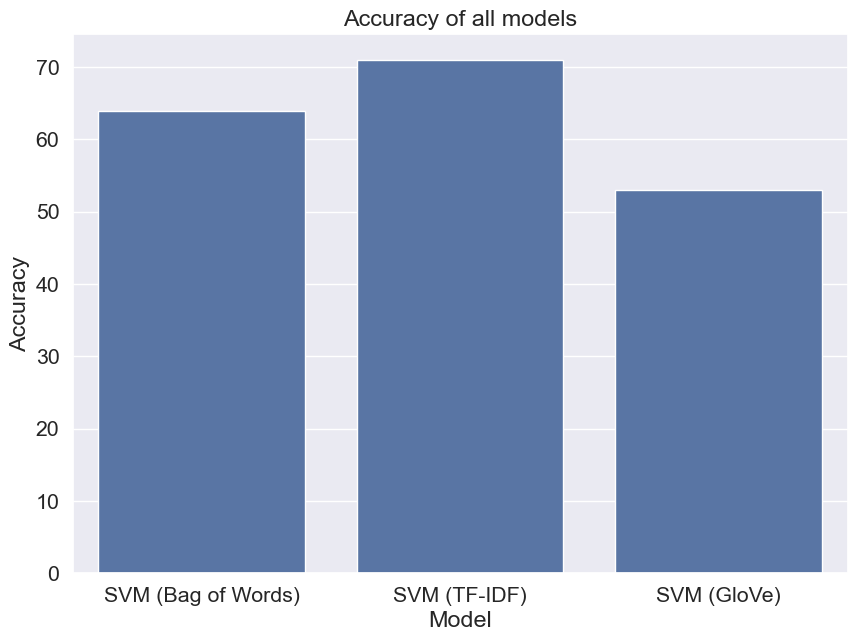

In [101]:
# Creating plots for accuracy, precision, recall and f1-score
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy of all models
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4) # for label size
sns.barplot(x=['SVM (Bag of Words)', 'SVM (TF-IDF)', 'SVM (GloVe)'], y=[64, 71, 53])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy of all models')
plt.show()


**It shows the superiority of TF-IDF model over other models** and number showed that it is better in Precision, Recall and F1-score as well for all the three classes

**From Classification report we can claim that TF-IDF was able to extract more meaningfull data from the dataframe. Hence we save the model went to deploy it on on interface using Tkinter**

**Deployment ans Interface**

In [14]:
import tkinter as tk
from tkinter import messagebox
import pickle

# Load the saved sentiment analysis model using pickle
sim_model = pickle.load(open('svm_tfidf.sav', 'rb'))

# Function to analyze the sentiment
def get_sentiment():
    # Get the user input
    user_input = entry.get("1.0", "end-1c")

    # Check if the user has entered anything
    if user_input == '':
        messagebox.showerror("Error", "Please enter a post")
    else:
        # Clean the user input
        user_input = clean_text(user_input)
        user_input = remove_stopwords(user_input)
        user_input = tokenizer.tokenize(user_input.lower())
        user_input = word_lemmatizer(user_input)
        user_input = ' '.join(user_input)
        user_input = remove_hashtag_emoji(user_input)
        

        # Predict the sentiment
        sentiment = sim_model.predict(tfidf.transform([user_input]).toarray())

        # Display the sentiment
        if sentiment == 0:
            messagebox.showinfo("Result", "Positive")
        elif sentiment == 1:
            messagebox.showinfo("Result", "Negative")
        else:
            messagebox.showinfo("Result", "Neutral")

        
# Create a Tkinter window
root = tk.Tk()
root.title("Social Media Sentiment Analysis")

# Create a label
label = tk.Label(root, text="Enter your social media post:")
label.pack()

# Create an entry field
entry = tk.Text(root, height=5, width=50)
entry.pack()

# Create a button to trigger sentiment analysis
button = tk.Button(root, text="Analyze Sentiment", command=get_sentiment)
button.pack()

# Run the Tkinter main loop
root.mainloop()

2023-12-13 19:40:40.152 Python[89631:1516583] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
